In [27]:
%matplotlib
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import random

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

Using matplotlib backend: nbAgg


In [25]:
    # means and standard deviations
    means = df.mean(axis=1)
    std = df.std(axis=1)

    # n is given above
    n = 3650

    # compute the 95% confidence intervals
    yerr = std / np.sqrt(n) * 1.96
    CI_list = [ss.norm.interval(0.95, loc=mean, scale=se) for mean, se in zip(means, std / np.sqrt(n))]


<IPython.core.display.Javascript object>


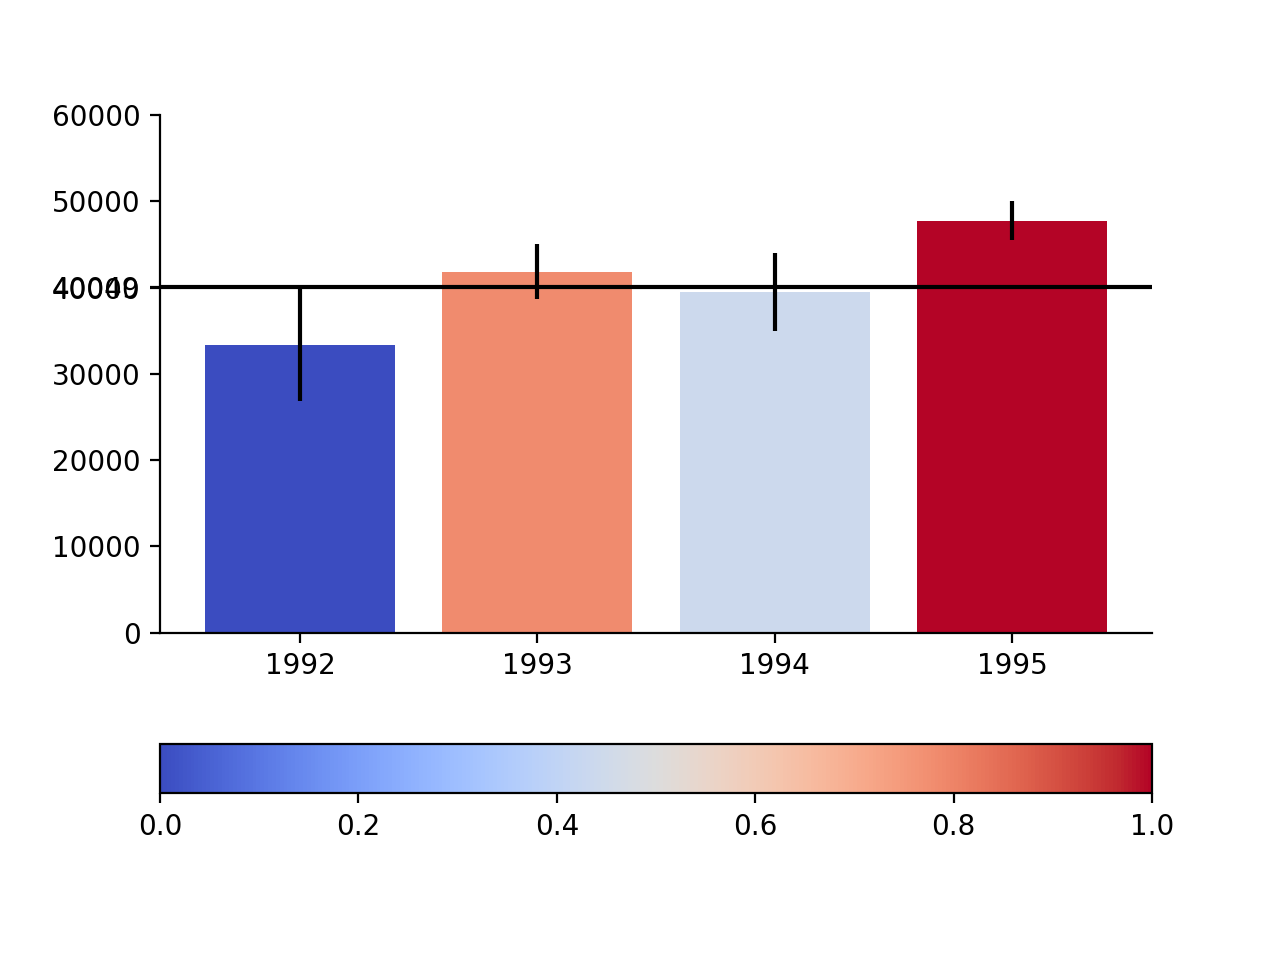

In [28]:
# a function to calculate the probability
def calculate_pro(y, ci):
    if y < np.min(ci):
        result = 1.0
    elif y > np.max(ci):
        result = 0.0
    else:
        result = (np.max(ci) - y) / (np.max(ci) - np.min(ci))
    return result

# generalize a y by random
y = random.randint(40000, 45000)

# calculate the pro
prob_list = [compute_probs(y, ci) for ci in CI_list]

# setup the colormap
cmap = cm.get_cmap('coolwarm')
cpick = cm.ScalarMappable(cmap=cmap, norm=col.Normalize(vmin=0, vmax=1.0))
cpick.set_array([])

# setup the plot
rects = plt.bar(range(4), means, yerr=yerr, color = cpick.to_rgba(prob_list))

# add the horizontal line 
plt.axhline(y=y, zorder=1, color='k')

# add its value
yt = plt.gca().get_yticks()
yt = np.append(yt, y)
plt.gca().set_yticks(yt)

# set x-axis
plt.xticks(range(4), df.T.columns)

# add the instructions
cbar = plt.colorbar(cpick, orientation="horizontal")

# remove the boundary at top and right
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]

plt.show()

In [13]:
len(df.T.columns)

4